In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import utils
import ot

# On the entropic barycentric map for TDA

In [3]:
def random_dgm(n, scale):
    x = scale * np.random.rand(n)
    y = x + np.random.exponential(scale=np.sqrt(scale/2), size=n)
    res = np.array([x,y]).T
    return res

In [4]:
n, m = 10, 15
scale=1
X = random_dgm(n, scale=scale)
Y = random_dgm(m, scale=scale)

#X = np.array([[0, 0.001],[0,2]])
#Y = np.array([[3, 3.001], [5, 5.001], [0, 3]])

In [5]:
P1, e1 = utils.hurot_tda(X, Y, eps=1)
P2, e2 = utils.hurot_tda(X, Y, eps=0.1)
P3, e3 = utils.hurot_tda(X, Y, eps=0.01)

converged at step t = 10
converged at step t = 61
converged at step t = 273


Text(0.5, 1.0, 'P_eps with eps = 0.01')

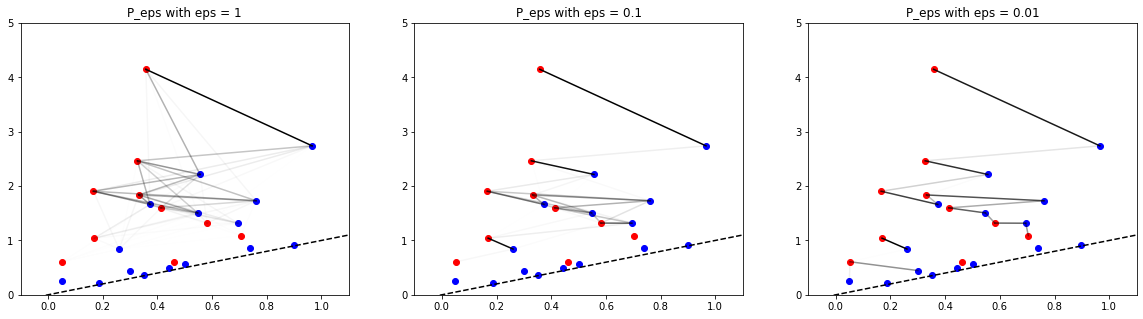

In [13]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))
ax = axs[0]
ax.scatter(X[:,0], X[:,1], marker='o', c='red')
ax.scatter(Y[:,0], Y[:,1], marker='o', c='blue')
ax.plot([-5,5],[-5,5], c='k', linestyle="dashed")
ax.set_xlim(-0.1,1.1)
ax.set_ylim(0,5)

utils.plot_transport_plan(ax=ax, xs=X, xt=Y, P=P1)

ax.set_title("P_eps with eps = 1")


ax = axs[1]
ax.scatter(X[:,0], X[:,1], marker='o', c='red')
ax.scatter(Y[:,0], Y[:,1], marker='o', c='blue')
ax.plot([-5,5],[-5,5], c='k', linestyle="dashed")
ax.set_xlim(-0.1,1.1)
ax.set_ylim(0,5)

utils.plot_transport_plan(ax=ax, xs=X, xt=Y, P=P2)

ax.set_title("P_eps with eps = 0.1")

ax = axs[2]
ax.scatter(X[:,0], X[:,1], marker='o', c='red')
ax.scatter(Y[:,0], Y[:,1], marker='o', c='blue')
ax.plot([-5,5],[-5,5], c='k', linestyle="dashed")
ax.set_xlim(-0.1,1.1)
ax.set_ylim(0,5)

utils.plot_transport_plan(ax=ax, xs=X, xt=Y, P=P3)

ax.set_title("P_eps with eps = 0.01")



In [9]:
T_eps = [utils.barycentric_map_tda(P, X, Y) for P in [P1, P2, P3]]

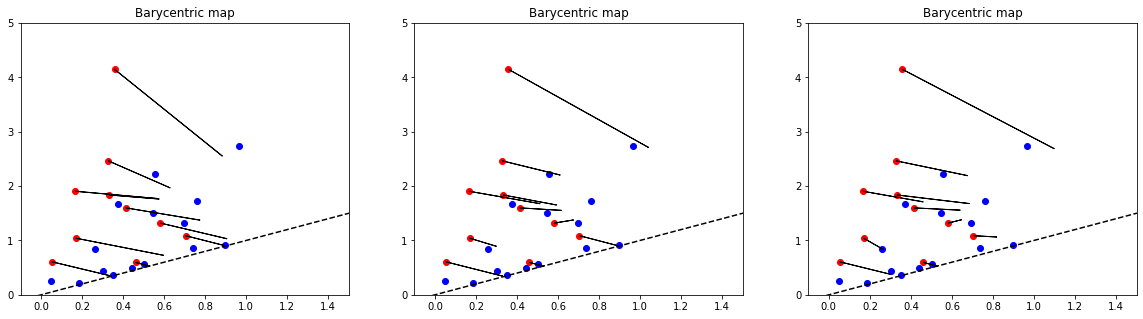

In [14]:
fig, axs = plt.subplots(1, 3, figsize=(20,5))

for i, T in enumerate(T_eps):
    ax = axs[i]
    ax.scatter(X[:,0], X[:,1], marker='o', c='red')
    ax.scatter(Y[:,0], Y[:,1], marker='o', c='blue')
    ax.plot([-5,5],[-5,5], c='k', linestyle="dashed")


    for x, t in zip(X, T):
        ax.arrow(x[0], x[1], t[0]-x[0], t[1]-x[1])

    ax.set_xlim(-0.1,1.5)
    ax.set_ylim(0,5)
    
    ax.set_title("Barycentric map")